# Portfolio Optimization using Sharpe Ratio and Sortino Ratio

## Introduction 

In this project, we aim to optimize a portfolio consisting of 10 stocks using two popular risk-adjusted performance measures: the Sharpe ratio and the Sortino ratio. Portfolio optimization plays a crucial role in the field of finance and can help investors make informed decisions by maximizing returns while managing risk effectively. *[More here](https://optimization.cbe.cornell.edu/index.php?title=Portfolio_optimization "Title")*
- The **Sharpe ratio**, developed by Nobel laureate William F. Sharpe, is a widely used measure of risk-adjusted return. It takes into account both the average return and the volatility (risk) of an investment. The higher the Sharpe ratio, the more attractive the investment is considered.
- The **Sortino ratio** is a variation of the Sharpe ratio that focuses specifically on downside risk. While the Sharpe ratio considers both positive and negative returns, the Sortino ratio only considers **the downside deviation**. It helps investors assess the risk of a portfolio by penalizing only negative returns.

First, we will use historical data from June 2010 to June 2016, after that we will look into the performance of our optimized portfolios over the period from the remaining of 2016 to December 2019. 
We will be using Python within Jupyter Notebook and we will provide some explanation on finance concepts along the way.

## Import packages and collect historical price data for 10 stocks in the portfolio

In [1]:
# importing our necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import yfinance as yf
yf.pdr_override()
from pandas_datareader import data as pdr
%matplotlib inline
pd.set_option('mode.chained_assignment', None)

In [2]:
# List of ticker symbols
stocks = ['AAPL','AMZN','COP','DIS','GOOG','MSFT','TSLA','UNH','WFC','XOM']

Ticker Symbol is the use of letters to represent shares that are traded on the stock market. Each symbol therefore represent a share of a company. The companies listed are respectively :
1. AAPL - Apple Inc.
2. AMZN - Amazon.com Inc.
3. COP - ConocoPhillips
4. DIS - The Walt Disney Company
5. GOOG - Alphabet Inc. (formerly Google Inc.)
6. MSFT - Microsoft Corporation
7. TSLA - Tesla Inc.
8. UNH - UnitedHealth Group Incorporated
9. WFC - Wells Fargo & Company
10. XOM - Exxon Mobil Corporation

In [3]:
# empty dictionnary that will store our stock info
portfolio = {}

#loop to read and store the adj close column from all csv files into our dictionnary
for x_stock in stocks:
    portfolio[x_stock] = pd.read_csv(str('../STOCK/'+x_stock +'.csv'),parse_dates= True, index_col = 'Date')[['Adj Close']]

In [4]:
# looking at the data frame that contains historical price for Disney within the portfolio dictionnary
portfolio['DIS'].head(3)

,Adj Close
Date,
2010-06-30,28.872496
2010-07-01,28.863330
2010-07-02,28.762505


In [5]:
# Creating the data frame that contains historical price for a market index, the Dow Jones Industrial average
# The Dow Jones Industrial Average groups together the prices of 30 of the most traded stocks on the 
#New York Stock Exchange (NYSE) and Nasdaq. It is an index that helps investors determine the overall direction of stock prices
market = pd.read_csv('../STOCK/DJI.csv', parse_dates= True, index_col = 'Date')[['Adj Close']]
market.head(3)

,Adj Close
Date,
2010-06-30,9774.019531
2010-07-01,9732.530273
2010-07-02,9686.480469


## Create the equal weighted portfolio

A portfolio is a collection of financial investments like stocks, bonds, commodities, cash, and cash equivalents, including closed-end funds and exchange traded funds (ETFs). [More here](https://www.investopedia.com/terms/p/portfolio.asp/ "Title")

To create an equal weighted portfolio we need to attribute the same weight to each component of the portfolio, since we have 10 stocks in our `portfolio` each would then have a weight of 10% adding up to 100 %. We would then optimize the weights of the stocks given the scenario to arrive at the optimal risky portfolio using both the sortino and Sortino ratio.

In [6]:
# Create 'Normalized Return' column for each Data frame containing historical prices for our stocks
for i_stock, stock_data in portfolio.items():
    first_adj_close = stock_data.iloc[0]['Adj Close'] # Select the first row from the Adj Close column
    stock_data['Normalized Return'] = stock_data['Adj Close'] / first_adj_close


In [7]:
# Create allocation of 10% for each stock 
for i_stock, stock_data in portfolio.items():
    stock_data['Weight'] = stock_data['Normalized Return'] * 0.10

In [8]:
# Set the value of the portfolio to $100k
for i_stock, stock_data in portfolio.items():
    stock_data['Position Value'] = stock_data['Weight'] * 100000

In [9]:
# Examine the data frame that contains historical prices for Microsoft along with the allocation and the value of the position 
portfolio['MSFT'].head(3)

,Adj Close,Normalized Return,Weight,Position Value
Date,,,,
2010-06-30,19.541996,1.000000,0.100000,10000.000000
2010-07-01,19.669388,1.006519,0.100652,10065.188837
2010-07-02,19.762810,1.011299,0.101130,10112.994599


## Equal weighted portfolio performance

In [10]:
# Create position_values dictionary with the position value column of each stock
position_values_ew = {}

for i_stock, stock_data in portfolio.items():
    position_values_ew[i_stock] = stock_data['Position Value']

In [11]:
# Convert the position_values dictionary to a DataFrame
position_values_ew = pd.DataFrame(data=position_values_ew)

position_values_ew.head(3)

,AAPL,AMZN,COP,DIS,GOOG,MSFT,TSLA,UNH,WFC,XOM
Date,,,,,,,,,,
2010-06-30,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
2010-07-01,9878.741933,10155.592165,9955.184293,9996.825352,9877.289738,10065.188837,9215.274444,9806.340780,9835.937083,9919.397260
2010-07-02,9817.516237,9989.017024,9944.997768,9961.904575,9811.214313,10112.994599,8057.071339,9964.792025,9718.749156,9912.388164


In [12]:
position_values_ew['Portfolio Value'] = position_values_ew.sum(axis=1)

In [13]:
(position_values_ew['Portfolio Value'])

Date
2010-06-30    100000.000000
2010-07-01     98705.771886
2010-07-02     97290.645199
2010-07-06     97028.096351
2010-07-07     99850.801768
                  ...      
2016-06-24    368926.273544
2016-06-27    367285.331289
2016-06-28    374186.534098
2016-06-29    381803.027424
2016-06-30    384600.132663
Name: Portfolio Value, Length: 1512, dtype: float64

In [14]:
# calculate daily returns for the stocks and overall portfolio
position_var_ = position_values_ew.pct_change().dropna()

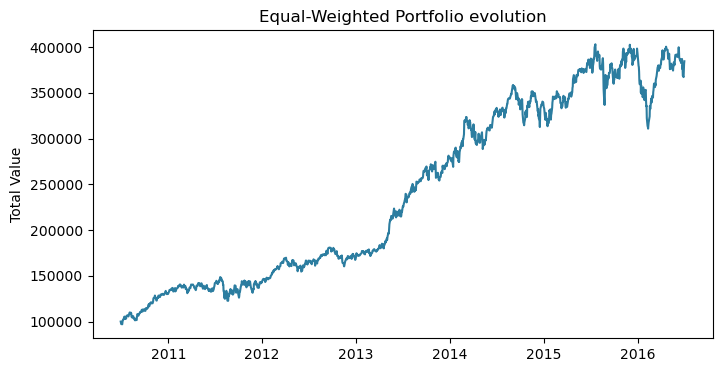

In [15]:
# View the overall portfolio value over the years
plt.figure(figsize=(8, 4))
plt.plot(position_values_ew['Portfolio Value'], color ='#2c7da0')

plt.title('Equal-Weighted Portfolio evolution')
plt.ylabel('Total Value');

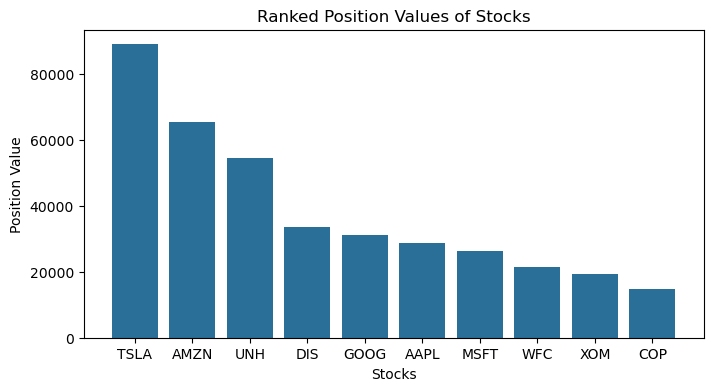

In [16]:
# View the ranked overall stocks position values ranked from highest to lowest
# create a function to sort columns by their last value
def sort_columns_by_last_value(df):
    return df[df.columns[:-1]].iloc[-1].sort_values(ascending=False)

# sort the columns by their last value
sorted_columns = sort_columns_by_last_value(position_values_ew)
#set plot size
plt.figure(figsize=(8,4))
# plot the bar chart
plt.bar(sorted_columns.index, sorted_columns, color='#2a6f97')

# add axis labels and a title
plt.xlabel('Stocks')
plt.ylabel('Position Value')
plt.title('Ranked Position Values of Stocks')

# display the plot
plt.show()

We can observe with this graph that our TSLA (TESLA) shares have the most significant return over time in our equally weighted portfolio, followed by our AMZN (Amazon) and UNH (United Health Group) shares. COP (Conoco Philips) and XOM (Exxon Mobil) are the two worst performers relatively in our portfolio, both the companies belong in the Oil & Gas industry which can be an indicator of the sector overall's performance for the concerned period.

In [17]:
for stock in stocks :      
    Return = round(position_values_ew[stock][-1]/position_values_ew[stock][0],2)
    print(stock, "return is:", str(Return*100),"%")

AAPL return is: 289.0 %
AMZN return is: 655.0 %
COP return is: 149.0 %
DIS return is: 336.0 %
GOOG return is: 311.0 %
MSFT return is: 262.0 %
TSLA return is: 891.0 %
UNH return is: 545.0 %
WFC return is: 214.0 %
XOM return is: 194.0 %


## Comparing our equal weighted portfolio with the market performance

In [18]:
# define end and start value
end_value_m= market['Adj Close'][-1]
start_value_m = market['Adj Close'][0]

cumulative_return_m = end_value_m/start_value_m -1
print("The market overall return is:", str(round(cumulative_return_m*100,2)), '%')

The market overall return is: 83.45 %


This goes to show that even the lowest performing stock in our portfolio outperfomed the Dow from Jan 2010 to June 2016.

In [19]:
# calculate daily returns for the market index DJI
market = market.pct_change().dropna()

In [20]:
# rename adj close column
market = market.rename(columns={'Adj Close': 'Market_index'})

In [21]:
#Create new data frame to compare market returns with portfolio return
stocks_dow = pd.concat([market,position_var_], axis=1)

Correlation is a statistical tool that measure the degree of relationship two variables. In finance, correlation can measure the relationship between the price movements or returns of different assets.  A correlation coefficient of +1 indicates a perfect positive correlation, -1 indicates a perfect negative correlation, and 0 suggests no correlation. *[Learn more](https://www.investopedia.com/terms/c/correlation.asp/ "Title")*

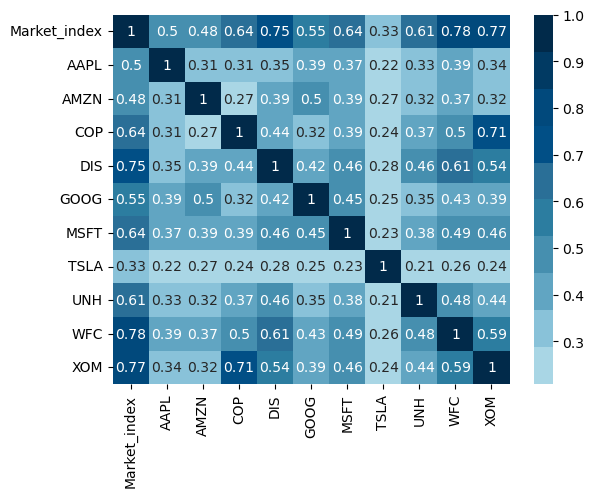

In [22]:
#visualization of a correlation matrix for our market index and our stocks
cus_pa = ['#a9d6e5','#89c2d9','#61a5c2','#468faf','#2c7da0','#2a6f97','#014f86','#01497c','#013a63','#012a4a']
sns.heatmap(stocks_dow.iloc[:,0:11].corr(), vmax=1, annot=True, cmap=cus_pa);

From the correlation matrix we learn that TSLA has the weakest correlation with the market index and WFC (Wells Fargo) has quite a strong positive correlation with the DOW. Interstingly enough we can observe that TSLA has an even weaker correlation with the other shares, which can prove to be an advantage from a diversification standpoint. 

In [23]:
# Define the end and start value of the portfolio
end_value = position_values_ew['Portfolio Value'][-1]
start_value = position_values_ew['Portfolio Value'][0]

# Calculate the cumulative portfolio return as a percentage
cumulative_return_p = end_value / start_value - 1

print("The portfolio overall return is:", str(round(cumulative_return_p*100,2)), '%')

The portfolio overall return is: 284.6 %


In [24]:
# avg daily return
avg_return = position_var_['Portfolio Value'].mean()
print('The average daily return is:', str(round(avg_return*100, 2)),'%')

The average daily return is: 0.1 %


In [25]:
# portfolio variance
var_return = position_var_['Portfolio Value'].std()
print('The std of daily return is:', str(round(var_return*100, 2)),'%')

The std of daily return is: 1.25 %


In [26]:
#isolating downside risk to calculate Sortino ratio
down_pos_var = position_var_.copy()
down_pos_var[position_var_ > 0] = 0

In [27]:
#variance for downside only
var_return_ = down_pos_var['Portfolio Value'].std()
print('The downside std dev of the return is:', str(round(var_return_*100, 2)),'%')

The downside std dev of the return is: 0.75 %


## Sharpe ratio

In [28]:
# Calculate the Sharpe ratio
# assuming the risk free rate is close to 0
sharpe_ratio = avg_return/var_return
# Annualize the Sharpe ratio
sharpe_ratio_annualized = sharpe_ratio * 252**0.5
sharpe_ratio_annualized

1.2333942505373978

## Sortino ratio

In [29]:
# Calculate the sortino ratio similar to the Sharpe but for downside risk only
# assuming the risk free rate is close to 0
sortino_ratio = avg_return/var_return_
# Calculate the annualized Sortino ratio
sortino_ratio_annualized = sortino_ratio * 252**0.5

sortino_ratio_annualized

2.060831787011042

## What's an optimized portfolio

An optimal portfolio is one that finds the right balance between risk and return. It is not possible to have a portfolio with both zero risk and high returns. In order to earn higher returns, investors must take on more risk. However, there is a limit to how much risk an investor should take on. The optimal portfolio is the one that maximizes returns for a given level of risk that the investor is willing to take, or the one that minimize the risk for a given level of return the investor is seeking. *[To learn more](https://www.motilaloswal.com/article-details/what-do-we-understand-by-an-optimal-portfolio-/1924 "Title")* 

## Prepare Scenarios to Optimize Portfolio Weighting
We need to prepare our data ahead of generating our scenarios to optimize the portfolio weighting. We will:
 * Create a dictionary containing the adjusted close for each of our stocks: stock_adj_close
 * Create another dictionary that transforms the adjusted close for each day to a percent change from the previous day

In [30]:
stock_adj_close = {}

for i_stock, stock_data in portfolio.items():
    stock_adj_close[i_stock] = stock_data['Adj Close']

In [31]:
# Convert the stock_adj_close dictionary to a DataFrame
stock_adj_close = pd.DataFrame(data=stock_adj_close)

stock_adj_close.head(3)

,AAPL,AMZN,COP,DIS,GOOG,MSFT,TSLA,UNH,WFC,XOM
Date,,,,,,,,,,
2010-06-30,33.075655,5.463,29.174816,28.872496,222.253131,19.541996,23.830000,23.440144,22.132058,48.248732
2010-07-01,32.674586,5.548,29.044067,28.863330,219.525857,19.669388,21.959999,22.986204,21.768953,47.859834
2010-07-02,32.472078,5.457,29.014348,28.762505,218.057310,19.762810,19.200001,23.357616,21.509592,47.826016


In [32]:
# Create stock_returns DataFrames to see the day over day change in stock value
stock_returns = stock_adj_close.pct_change().dropna()

stock_returns.head(3)

,AAPL,AMZN,COP,DIS,GOOG,MSFT,TSLA,UNH,WFC,XOM
Date,,,,,,,,,,
2010-07-01,-0.012126,0.015559,-0.004482,-0.000317,-0.012271,0.006519,-0.078473,-0.019366,-0.016406,-0.008060
2010-07-02,-0.006198,-0.016402,-0.001023,-0.003493,-0.006690,0.004750,-0.125683,0.016158,-0.011914,-0.000707
2010-07-06,0.006844,0.008430,0.007784,0.010835,-0.001099,0.023636,-0.160937,0.020848,0.010852,0.015733


## Build & Run 20,000 Portfolio Scenarios

In [33]:
# Define the number of scenarios and create a blank array to populate stock weightings for each scenario
scenarios = 20000

weights_array = np.zeros((scenarios, len(stock_returns.columns)))


In [34]:
# Create additional blank arrays for scenario output
returns_array = np.zeros(scenarios)
volatility_array = np.zeros(scenarios)
sharpe_array = np.zeros(scenarios)
sortino_volatility = np.zeros(scenarios)
sortino_array = np.zeros(scenarios)

In [35]:
import random
random.seed(177)
np.random.seed(177)

for index in range(scenarios): 
    # Generate ten random numbers for each index
    numbers = np.array(np.random.random(len(stocks)))
    
    # Divide each number by the sum of the numbers to generate the random weight
    weights = numbers / np.sum(numbers)
    
    # Save the weights in weights_array
    weights_array[index,:] = weights
    
    # Calculate the return for each scenario
    returns_array[index] = np.sum(stock_returns.mean()*252*weights)
    
    # Calculate the expected volatility for each scenario
    volatility_array[index] = np.sqrt(np.dot(weights.T,np.dot(stock_returns.cov()*252, weights)))

    # Calculate the Sharpe Ratio for each scenario 
    sharpe_array[index] = returns_array[index] / volatility_array[index]
    
    # Calculate the downside deviation for each scenario
    downside_deviation = stock_returns.copy()
    downside_deviation= downside_deviation[downside_deviation < 0]
    sortino_volatility[index] = np.sqrt(np.dot(weights.T, np.dot(downside_deviation.cov()*252, weights)))
    

    # Calculate the Sortino Ratio for each scenario
    sortino_array[index] = returns_array[index] / sortino_volatility[index]


In [36]:
print("The Sharpe ratio of the second portfolio is:", sharpe_array[1])

The Sharpe ratio of the second portfolio is: 1.345782561283864


In [37]:
print("The Sortino ratio of the fourth portfolio is:", sortino_array[3])

The Sortino ratio of the fourth portfolio is: 1.8899315608188785


## Identify optimal portfolio
 Now that we have the output for all 20,000 scenarios, we can identify the two optimal portfolios. The optimal portfolios in this case study are the ones that have the highest Sharpe ratio and the highest Sortino ratio

In [38]:
# Find the highest sharpe ratio in sharpe_array
sharpe_array.max()

1.5508701933385602

In [39]:
# Find the highest sortino ratio in sharpe_array
sortino_array.max()

2.364388972326061

In [40]:
# Find the index of the optimal portfolio using Sharpe ratio
index_max_sharpe = sharpe_array.argmax()
index_max_sharpe

14218

In [41]:
# Find the index of the optimal portfolio using Sortino ratio
index_max_sortino = sortino_array.argmax()
index_max_sortino

16650

In [42]:
# assigning arrays for Sharpe and Sortino weights

opt_weights_sharpe = weights_array[index_max_sharpe,:]
opt_weights_sortino = weights_array[index_max_sortino,:]

# converting arrays to lists for better manipulation
weights_list_sharpe = opt_weights_sharpe.tolist()
weights_list_sortino = opt_weights_sortino.tolist()

In [43]:
# quick function to properly display the weights obtained
def display_weight(w_list):
    for stock, weight in zip(stocks, w_list):
        print(stock, str(weight*100),"%")

In [44]:
print("Sharpe optimized weights:")
display_weight(weights_list_sharpe)
print("\n")
print("Sortino optimized weights:")
display_weight(weights_list_sortino)

Sharpe optimized weights:
AAPL 3.9101697188620133 %
AMZN 12.104403743312721 %
COP 0.6050439031281121 %
DIS 17.208299668767353 %
GOOG 9.255141104810656 %
MSFT 8.506493065783765 %
TSLA 6.623943864169435 %
UNH 33.612149568305156 %
WFC 0.4231620183953652 %
XOM 7.751193344465427 %


Sortino optimized weights:
AAPL 4.654116651908935 %
AMZN 18.84179022998842 %
COP 0.34024411285765727 %
DIS 2.1717593111516442 %
GOOG 4.055205403879305 %
MSFT 15.085091364732031 %
TSLA 19.95720843682724 %
UNH 28.793633462374785 %
WFC 3.532955853429677 %
XOM 2.5679951728503028 %


Using the Sharpe ratio, we can observe that the optimized portfolio is heavily weighted in **UNH** (33.61%), followed by **DIS** (17.21%), **AMZN** (12.10%), and **AAPL** (3.91%) . The remaining stocks have relatively small weightings with **WFC** (0.42%) being the lowest.
Meanwhile using the Sortino ratio, the optimized portofolio is still heavily weighted in **UNH** (28.79%) but less in comparison, followed by **TSLA** (19.96%), **AMZN** (18.84%), **AAPL** (4.65%). The remaining stocks have relatively small weightings. For the first portfolio, the weighting scheme suggests that the investor is seeking to maximize return while minimizing risk, as for the second the weighting scheme suggests that the investor is seeking to maximize return while accepting a moderate amount of risk. 

## Visualize the Optimal Portfolio & Portfolio Scenarios
Let's visualize our portfolio scenarios by using a scatter chart. We can use the volatility and returns arrays on each axis to see the relationship between risk and reward. As a final step, we can visualize where the optimal portfolio appears among all of the scenarios.

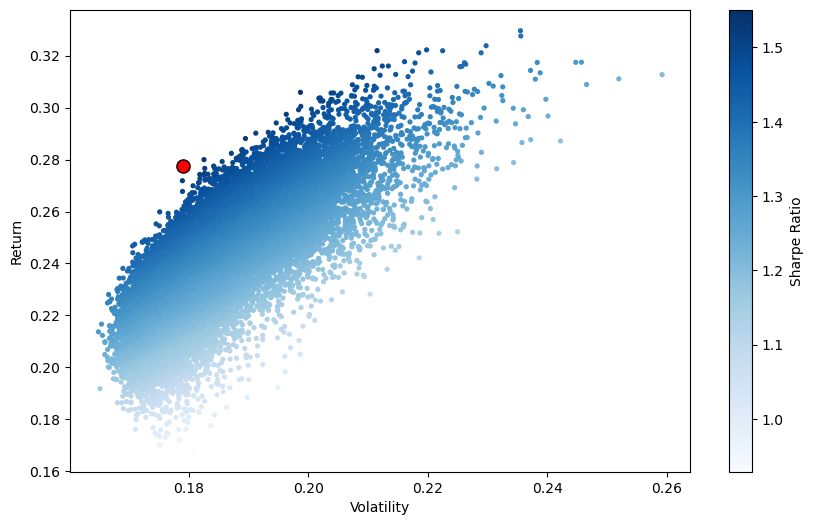

In [45]:
# Identify the optimal portfolio in the returns and volatility arrays
max_sharpe_return = returns_array[index_max_sharpe]
max_sharpe_volatility = volatility_array[index_max_sharpe]

# Visualize volatility vs returns for each scenario
plt.figure(figsize=(10,6))

plt.scatter(volatility_array, returns_array, c=sharpe_array, cmap= 'Blues', marker ='.', s= 30)

plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Add the optimal portfolio to the visual
plt.scatter(max_sharpe_volatility, max_sharpe_return, c='red', edgecolors='black', marker ='o',  s= 90);

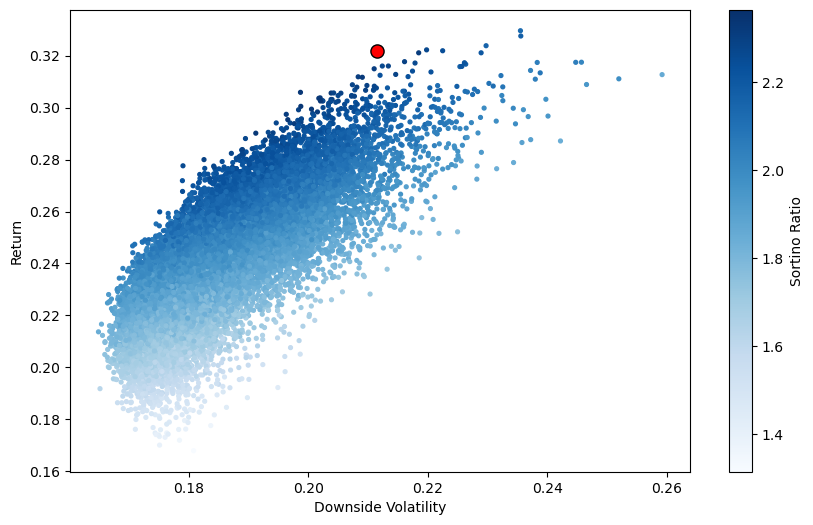

In [46]:
# Identify the optimal portfolio in the returns and volatility arrays
max_sortino_return = returns_array[index_max_sortino]
max_sortino_volatility = volatility_array[index_max_sortino]

# Visualize volatility vs returns for each scenario
plt.figure(figsize=(10,6))

plt.scatter(volatility_array, returns_array, c=sortino_array, cmap= 'Blues', marker ='.', s= 30)

plt.colorbar(label='Sortino Ratio')
plt.xlabel('Downside Volatility')
plt.ylabel('Return')

# Add the optimal portfolio to the visual
plt.scatter(max_sortino_volatility, max_sortino_return, c='red', edgecolors='black', marker ='o',  s= 90);

We can see that our optimal portfolio using the Sharpe ratio offers a daily return nearing __0.28%__ which is less than what we achieve with the Sortino ratio where our daily return sits at over __0.32%__, however the latter is subject to more volatility at around **0.21%** compared to our the Sharpe's one nearing **0.18%**. This further illustrates the trade-off between risk and return the investor might be willing to take using the Sortino as we pointed out earlier. 

## Importing new data
The plan is to observe the results of our improved portfolios using updated data. We'll follow a comparable procedure to when we built the equally weighted portfolio, but this time we'll utilize the weight lists obtained through optimizing the Sharpe and Sortino ratios.


In [71]:
#Instead of csv files we'll be importing data directly from Yahoo finance with packages
#Set start and end date parameters
startdate = '2016-07-01'
enddate = '2019-12-31'

# Create an empty dictionary to store our stock info
portfolio_opt = {}

# Loop through each ticker in the stocks and return the Adj Close and save the data frame in the portfolio
for x_stock in stocks:
    portfolio_opt[x_stock] = pdr.get_data_yahoo(x_stock, start = startdate, end = enddate)[['Adj Close']]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [72]:
portfolio_opt['DIS'].head(3)

,Adj Close
Date,
2016-07-01,92.485741
2016-07-05,92.136665
2016-07-06,92.881973


In [73]:
# Create 'Normalized Return' column for each Data frame containing historical prices for our stocks
for i_stock, stock_data in portfolio_opt.items():
    first_adj_close = stock_data.iloc[0]['Adj Close'] # Select the first row from the Adj Close column
    stock_data['Normalized Return'] = stock_data['Adj Close'] / first_adj_close

In [74]:
# Attribute each weight obtained using the Sharpe to each stock 
for i_stock, stock_data in enumerate(portfolio_opt.values()):
    stock_data['Weight Sharpe'] = stock_data['Normalized Return'] * weights_list_sharpe[i_stock]

In [75]:
# Since it's a continuation of the previous portfolio with new optimized weights we'll use the end value of the equal weighted portfolio
for i_stock, stock_data in portfolio_opt.items():
    stock_data['Position Value Sharpe'] = stock_data['Weight Sharpe'] * end_value

In [76]:
# Create allocation of 10% for each stock 
for i_stock, stock_data in portfolio_opt.items():
    stock_data['Weight Equal'] = stock_data['Normalized Return'] * 0.10

In [77]:

for i_stock, stock_data in portfolio_opt.items():
    stock_data['Position Value Equal Weight'] = stock_data['Weight Equal'] * end_value

In [78]:
for i_stock, stock_data in enumerate(portfolio_opt.values()):
    stock_data['Weight Sortino'] = stock_data['Normalized Return'] * weights_list_sortino[i_stock]

In [79]:
# repeating same steps done for the Sharpe optimized portfolio
for i_stock, stock_data in portfolio_opt.items():
    stock_data['Position Value Sortino'] = stock_data['Weight Sortino'] * end_value

In [80]:
portfolio_opt['TSLA'].head(3)

,Adj Close,Normalized Return,Weight Sharpe,Position Value Sharpe,Weight Equal,Position Value Equal Weight,Weight Sortino,Position Value Sortino
Date,,,,,,,,
2016-07-01,14.433333,1.000000,0.066239,25475.696889,0.100000,38460.013266,0.199572,76755.450124
2016-07-05,14.265333,0.988360,0.065468,25179.166448,0.098836,38012.348783,0.197249,75862.036783
2016-07-06,14.296000,0.990485,0.065609,25233.294393,0.099048,38094.064368,0.197673,76025.118279


In [81]:
# Create position_values dictionary with the position value column of each stock
position_values_sharpe = {}

for i_stock, stock_data in portfolio_opt.items():
    position_values_sharpe[i_stock] = stock_data['Position Value Sharpe']
    

In [82]:
# Create position_values dictionary with the position value column optimized with Sortino of each stock
position_values_sortino = {}
for i_stock, stock_data in portfolio_opt.items():
    position_values_sortino[i_stock] = stock_data['Position Value Sortino']

In [83]:
# Create position_values dictionary with the position value column optimized with Sortino of each stock
position_values_eq_w = {}
for i_stock, stock_data in portfolio_opt.items():
    position_values_eq_w[i_stock] = stock_data['Position Value Equal Weight']

In [84]:
# Convert the position_values dictionary to a DataFrame
position_values_sharpe = pd.DataFrame(data=position_values_sharpe)

position_values_sharpe.head(3)

,AAPL,AMZN,COP,DIS,GOOG,MSFT,TSLA,UNH,WFC,XOM
Date,,,,,,,,,,
2016-07-01,15038.517926,46553.552855,2326.999654,66183.143355,35595.284967,32715.983616,25475.696889,129272.371831,1627.481684,29811.099886
2016-07-05,14897.372004,46708.797716,2230.197491,65933.343747,35378.420085,32722.379721,25179.166448,129914.780474,1599.104951,29550.592554
2016-07-06,14982.063704,47318.882268,2240.894576,66466.688895,35521.979075,32856.670976,25233.294393,130667.315648,1614.331601,29890.513320


In [85]:
# Convert the position_values dictionary to a DataFrame
position_values_sortino = pd.DataFrame(data=position_values_sortino)

position_values_sortino.head(3)

,AAPL,AMZN,COP,DIS,GOOG,MSFT,TSLA,UNH,WFC,XOM
Date,,,,,,,,,,
2016-07-01,17899.738818,72465.550221,1308.579309,8352.589192,15596.325363,58017.281401,76755.450124,110740.352495,13587.752899,9876.512842
2016-07-05,17731.738543,72707.205338,1254.142985,8321.063438,15501.304484,58028.624011,75862.036783,111290.667761,13350.837155,9790.205928
2016-07-06,17832.543643,73656.866751,1260.158450,8388.373824,15564.205869,58266.771016,76025.118279,111935.322216,13477.963598,9902.822766


In [86]:
position_values_eq_w = pd.DataFrame(data=position_values_eq_w)

position_values_eq_w.head(3)

,AAPL,AMZN,COP,DIS,GOOG,MSFT,TSLA,UNH,WFC,XOM
Date,,,,,,,,,,
2016-07-01,38460.013266,38460.013266,38460.013266,38460.013266,38460.013266,38460.013266,38460.013266,38460.013266,38460.013266,38460.013266
2016-07-05,38099.041922,38588.268126,36860.093618,38314.850982,38225.694978,38467.532352,38012.348783,38651.137206,37789.425367,38123.926524
2016-07-06,38315.635333,39092.286801,37036.892104,38624.785815,38380.807675,38625.401469,38094.064368,38875.025051,38149.255629,38562.466438


In [87]:
position_values_sharpe['Sharpe Portfolio Value'] = position_values_sharpe.sum(axis=1)
position_values_sortino['Sortino Portfolio Value'] = position_values_sortino.sum(axis=1)
position_values_eq_w['Equal Weight Portoflio Value'] = position_values_eq_w.sum(axis=1)


In [88]:
portfolio_final = pd.DataFrame()
portfolio_final['Sharpe Portfolio Value'] = position_values_sharpe['Sharpe Portfolio Value']
portfolio_final['Sortino Portfolio Value'] = position_values_sortino['Sortino Portfolio Value']
portfolio_final['Equal Weight Portoflio Value'] = position_values_eq_w['Equal Weight Portoflio Value']

portfolio_final

,Sharpe Portfolio Value,Sortino Portfolio Value,Equal Weight Portoflio Value
Date,,,
2016-07-01,384600.132663,384600.132663,384600.132663
2016-07-05,384114.155192,383837.826426,381132.319858
2016-07-06,386792.634457,386310.146412,383756.620683
2016-07-07,385475.034541,385488.918274,383148.027589
2016-07-08,388908.851549,388964.177413,387692.435512
...,...,...,...
2019-12-23,808606.064140,890580.441636,779828.994291
2019-12-24,808637.331937,891810.452863,780542.760575
2019-12-26,818526.232143,905914.587712,791284.675182


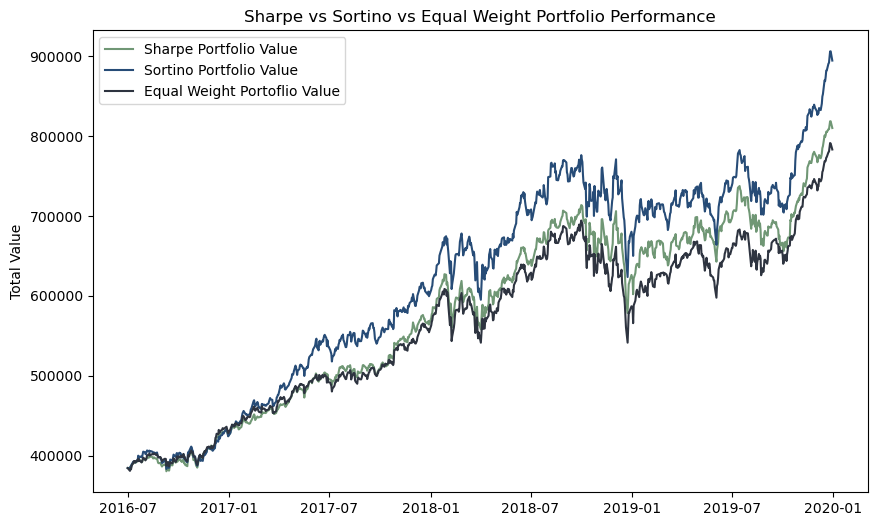

In [89]:

plt.figure(figsize=(10,6))
plt.plot(portfolio_final.iloc[:,0],data=portfolio_final, color='#709775')
plt.plot(portfolio_final.iloc[:,1],data=portfolio_final, color='#274c77')
plt.plot(portfolio_final.iloc[:,2],data=portfolio_final, color='#2E3440')



plt.title('Sharpe vs Sortino vs Equal Weight Portfolio Performance')
plt.ylabel('Total Value')
plt.legend();

In [90]:
# Calculating total return over span for the two portfolios
return_sharpe = (portfolio_final['Sharpe Portfolio Value'][-1]) /(portfolio_final['Sharpe Portfolio Value'][0]) - 1

print("The Sharpe portfolio overall return is:", str(round(return_sharpe*100,2)), '%')

return_sortino = (portfolio_final['Sortino Portfolio Value'][-1]) /(portfolio_final['Sortino Portfolio Value'][0]) - 1

print("The Sortino portfolio overall return is:", str(round(return_sortino*100,2)), '%')

return_eq_w = (portfolio_final['Equal Weight Portoflio Value'][-1]) /(portfolio_final['Equal Weight Portoflio Value'][0]) - 1

print("The Equal weighted portfolio overall return is:", str(round(return_eq_w*100,2)), '%')




The Sharpe portfolio overall return is: 110.63 %
The Sortino portfolio overall return is: 132.58 %
The Equal weighted portfolio overall return is: 103.64 %


In [91]:
# summary statitics for each stock return
position_values_sharpe.iloc[:,:10].pct_change().describe()

,AAPL,AMZN,COP,DIS,GOOG,MSFT,TSLA,UNH,WFC,XOM
count,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000
mean,0.001444,0.001203,0.000687,0.000572,0.000835,0.001445,0.001163,0.000985,0.000362,-0.000119
std,0.015094,0.016738,0.017551,0.011907,0.014015,0.013278,0.029188,0.013249,0.013094,0.011035
min,-0.099607,-0.078197,-0.060014,-0.052949,-0.076966,-0.054338,-0.139015,-0.051822,-0.092243,-0.056903
25%,-0.005125,-0.006142,-0.009424,-0.005195,-0.005085,-0.004645,-0.012914,-0.005619,-0.006503,-0.006241
50%,0.001001,0.001360,0.000170,0.000212,0.000772,0.001087,0.000120,0.000955,0.000206,0.000243
75%,0.008903,0.009541,0.011130,0.006069,0.008161,0.007968,0.016656,0.007452,0.007165,0.005923
max,0.070421,0.132164,0.096992,0.115437,0.104485,0.075706,0.176692,0.081599,0.075850,0.047779


Exxon Mobil (XOM) is the only stock in our sample to have a negative return over the second period of interest. On average, Apple (AAPL) and Microsoft (MSFT) had the highest returns. In terms of risk, TSLA stock had the most volatility, TSLA's returns ranged from -14% to 17.7%, making it a riskier investment than any other stock from a variance standpoint.

In [92]:
portfolio_final_r = portfolio_final.pct_change().dropna()
portfolio_final_r.describe()

,Sharpe Portfolio Value,Sortino Portfolio Value,Equal Weight Portoflio Value
count,879.000000,879.000000,879.000000
mean,0.000897,0.001027,0.000861
std,0.009948,0.011532,0.010176
min,-0.043643,-0.051612,-0.044273
25%,-0.003752,-0.004632,-0.003978
50%,0.001170,0.001276,0.001231
75%,0.006035,0.007460,0.006243
max,0.062576,0.071785,0.069466


**Takeaway** : From this we can observe that our two optimized portfolios outperformed an equal weight distribution setting on risk-adjusted returns over 879 observations beyond the optimization period. This was a crucial test of the robustness of our optimization process as it suggests that the portfolios generated by the optimization process are likely to continue to outperform over time, even if the market conditions change. However we need to be careful though, as there could be other factors to take into consideration and the likeliness of better performance can change under certain circumstances like a black swan event.

In [96]:
# let's see the actual downside deviation for the Sortino instead of the overall variance
downside_dev = portfolio_final_r['Sortino Portfolio Value']<0
downside_dev = portfolio_final_r[downside_dev]['Sortino Portfolio Value'].std()
print('The downside deviation of the Portfolio optimized with Sortino is', str(round(downside_dev*100,4)),"%")

The downside deviation of the Portfolio optimized with Sortino is 0.8272 %


## Conclusion

Our initial goal was to optimize an initial portfolio of 10 stocks equally allocated with an investment amount over an initial period of Jan 2010 to June 2016. We introduced basics concepts along the way and emphasized on the importance of optimization, which we achieved by successfully optimizing the equal weighted portfolio, using the Sharpe ratio and the Sortino ratio as risk-adjusted performance measures.\
Doing so we obtained two sets of weights to allocate to our stocks one using the Sharpe and the other using Sortino. The optimized portfolios were then evaluated with historical data from the remaining months of 2016 to December 2019, to test wether the optimized portfolio can sustain their performance compared to just an equal-weight approach beyond the optimization period, which prove to be true. However it is essential to acknowledge the limitations of this project. Historical performance does not guarantee future results, and market conditions are subject to change, potentially impacting the efficacy of the optimized portfolios in the future. Additionally, the models used in this project were based on historical data and assumptions, which may not perfectly capture real-world complexities and unpredictabilities.


## End of notebook